<a href="https://colab.research.google.com/github/mukul-mschauhan/Data-Science-Projects/blob/master/Anova%20with%20Calculations%20and%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Anova

1. The Fundamental Essence behind Anova is to check the difference in mean or variance between Groups. For e.g. Checking if the Patients are reacting to different methods of Treatment such as Sleep Therapy, Hypnotism, Medical Counselling etc

2. One Away Anova Means One Independent Variable with 2 Columns/Levels/Categories.

3. Two Way Anova means two or more independent variables with multiple levels/columns/categories

4. Levels: Suppose you are treating Alcoholic Patients and trying to reduce their Alcohol Consumption. You might split the group in three groups/levels such as Medication, Medication & Counselling, Meditation and Exercise, Counselling Only. Here the levels would be the categories defined above and dependent variable would be Quantity/No of Alcoholic Beverages Consumed in a Day. This will be a good example of Two Way Anova.

Thus, One Way Anova is study of comparing means/variance of two independent(unrelated) Groups Using F Distribution. For e.g. Researcher wants to study the Consumption of Tea on Weight Loss and Divides the group of People - Green Tea, Black Tea, English Tea or No Tea. Here we have one Numerical/Quantitative Variable and Another Categorical.

In Two Way Anova, we have more than one Independent Variable Use a two way ANOVA when you have one measurement variable (i.e. a quantitative variable) and two nominal variables. In other words, if your experiment has a quantitative outcome and you have two categorical explanatory variables, a two way ANOVA is appropriate.

The Categorical Variables are also called Factors in Anova.

### Assumptions for Two Way ANOVA
* Normal: The population must be close to a normal distribution.
* Independent: Samples must be independent.
* Variance: Population variances must be equal.
* Equal Samples: Groups must have equal sample sizes.


### About F Distribution


To perform an ANOVA test, we need to compare two kinds of variation, the variation between the sample means, as well as the variation within each of our samples.

2. We combine all of this variation into a single statistic, called the ​F statistic because it uses the F-distribution.

### How to Calculate Anova Steps

1. Find out the Degrees of Freedom for Within and Between

2. DFn - Degrees of Freedom Between (Columns - 1) (Numerator)
3. DFd - Degrees of Freedom Within (Total Data Points - Total Columns: N-k) (Denominator)

4. Find the Mean of All the Columns and Grand Mean of the Data

5. Sum of Square Total (SST) is sum of Difference of Data Point & Grand Mean Squared.

5. Sum of Square Within (SSW) is the sum of Difference of Data Point and Column Mean Squared.

6. Sum of Square Between (SSB) is the difference of SST and SSW (SST-SSW)

7. Next We Calculate the Mean Square Between which is nothing but the variance and it is given by SSB/DFn

8. Mean Square Within: SSw/dfd

9. F Statistic = Mean Square Between / Mean Square Within

10. Compare it with the Critical Value and conclude.


In [3]:
#from scipy import stats
stats.f.ppf(q = 0.95, dfn = 2,dfd = 6) # Same as Excel: Confidence Level, DFN and DFD

5.143252849784718

In [0]:
# Ho: No Difference in the Mean Across Three Levels mew1 = mew2 = mew3
# H1: Significant Difference in the Mean Across Three Levels mew1 = mew2 = mew3
import numpy as np
import pandas as pd
df = pd.DataFrame({"Col1":[1,2,5], "Col2":[2,4,2], "Col3": [2,3,4]})

In [7]:
df

,Col1,Col2,Col3
0,1,2,2
1,2,4,3
2,5,2,4


In [0]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
model = ols("Col3~Col1+Col2", data = df).fit()
anovatab = anova_lm(model)
print(anovatab)

           df        sum_sq   mean_sq    F  PR(>F)
Col1      1.0  1.846154e+00  1.846154  0.0     NaN
Col2      1.0  1.538462e-01  0.153846  0.0     NaN
Residual  0.0  4.733165e-30       inf  NaN     NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [12]:
stats.f_oneway(df["Col1"], df["Col2"], df["Col3"])

F_onewayResult(statistic=0.049999999999999996, pvalue=0.9516215013591449)

In [25]:
# Check if Data is Normal
#import scipy.stats as stats
stats.shapiro(df["Col1"]), stats.shapiro(df["Col2"]), stats.shapiro(df["Col3"])
# This is to find if the Data is Normal or Not

((0.923076868057251, 0.46326157450675964),
 (0.7500000596046448, -9.106917104872991e-07),
 (1.0, 0.999998927116394))

In [28]:
# Levene Test Tells us whether the Samples Have Equal Variance or not.
# Ho: Variance is Equal across Samples.
# H1: Ho is False.
stats.levene(df["Col1"], df["Col2"], df["Col3"])

# p value is greater than threshold a = 0.05, therefore we "fail to reject" the null hypothesis 
# (conclusion: samples come from populations with the same variance)

LeveneResult(statistic=0.3333333333333333, pvalue=0.7289999999999998)

In [0]:
# Lets Apply Manual Calculation
# Find the Col Mean and Grand Mean
col1_mean = df.mean()[0]
col2_mean = df.mean()[1]
col3_mean = df.mean()[2]
grandmean = (col1_mean+col2_mean+col3_mean)/3

In [0]:
# Lets Find the Degrees of Freedom
dfn = len(df.columns)-1 # DFBetween (Numerator)
dfd = df.shape[0] * df.shape[1] - df.shape[1] # DFwithin  (Denominator) N-k

In [0]:
# Find the Sum of Square Total
SST = np.sum((df["Col1"]-grandmean)**2) + np.sum((df["Col2"]-grandmean)**2) + np.sum((df["Col3"]-grandmean)**2)

In [0]:
# Find the Sum of Square Within
SSW = np.sum((df["Col1"]-col1_mean)**2) + np.sum((df["Col2"]-col2_mean)**2) + np.sum((df["Col3"]-col3_mean)**2)

In [0]:
# Find the Sum of Square Between
SSB = SST - SSW

In [56]:
# Find the Mean Square Between: SSB/DFbetween
MSB = SSB/dfn

# Find the Mean Square Within: SSB/DFbetween
MSW = SSW/dfd

# Calculate the F Statistic
f_stats = MSB/MSW

print(f_stats)

# Find the F Critical
stats.f.ppf(0.95, dfn, dfd)

# Conclusion: Since the F Stats< FCritical and hence we fail to reject the Ho.
# Meaning that the Mean Distribution is Nearly Same across all the 3 Groups.

0.04999999999999942


5.143252849784718

## Two Way Anova Example

* The Dataset has Two Factors (Independent Variables) - Genotype and Years Genotypes and years has 05 and 03 levels respectively.

* Since there are Two Factors to Evaluate and therefore it is Termed as Two Way Anova.

* Here, using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants.

* If you apply one-way ANOVA here, you can able to evaluate only one factor at a time.

* From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield



In [0]:
# Two way Anova
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")

In [62]:
d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


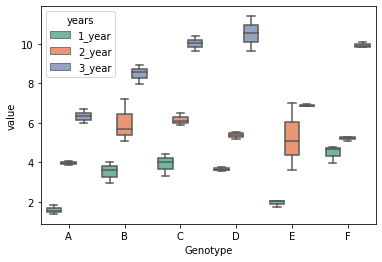

In [69]:
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set2") 

In [67]:
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


In [89]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ Genotype + years + Genotype:years', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Genotype,5.0,58.551733,11.710347,32.748581,1.931655e-12
years,2.0,278.925633,139.462817,390.014868,4.006243e-25
Genotype:years,10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN


## Conclusion

Interpretation: The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). 

We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

Note: Now, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.



In [86]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt["years"], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
1_year 2_year   2.1467 0.001 1.0864 3.2069   True
1_year 3_year   5.5217 0.001 4.4614 6.5819   True
2_year 3_year    3.375 0.001 2.3147 4.4353   True
-------------------------------------------------


In [91]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
crop = pd.read_csv("/gdrive/My Drive/Colab Notebooks/anova2.csv")

In [93]:
crop.head()

,Blend,Crop,Yield
0,Blend X,Wheat,123
1,Blend X,Wheat,156
2,Blend X,Wheat,112
3,Blend X,Wheat,100
4,Blend X,Corn,128


In [95]:
model = ols('Yield ~ Blend + Crop + Blend:Crop', data=crop).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

# Interpretation: The P-value obtained from ANOVA analysis for Blend, Crop, 
# and interaction are Not statistically significant (P<0.05).

,df,sum_sq,mean_sq,F,PR(>F)
Blend,1.0,2.041667,2.041667,0.003768,0.951730
Crop,2.0,2736.583333,1368.291667,2.525235,0.107978
Blend:Crop,2.0,2360.083333,1180.041667,2.177813,0.142223
Residual,18.0,9753.250000,541.847222,NaN,NaN


In [0]:
test = pd.read_csv("/gdrive/My Drive/Colab Notebooks/train_HK6lq50.csv")

In [117]:
#newtest = test.dropna()
newtest.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0


In [115]:
# Has Program Duration any impact on Pass or Fail
model = ols('is_pass~program_duration', data=newtest).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

# No Impact of Program Duration

,df,sum_sq,mean_sq,F,PR(>F)
program_duration,1.0,0.231416,0.231416,1.090388,0.296391
Residual,45370.0,9628.999652,0.212233,NaN,NaN


In [116]:
# Has the Exam Difficulty Level Any Role in Pass/Fail
data = pd.crosstab(newtest.difficulty_level, newtest.is_pass)
teststats, pvalue, df, exp_freq = stats.chi2_contingency(data)
print("Test Statistics: ", teststats)
print("PValue: ", pvalue)

# Represents that the Difficulty Level has role in Pass & Fail

Test Statistics:  712.7864719642091
PValue:  3.543333459044808e-154


In [132]:
# Has the Test Type and Is_Pass any Contribution in the Rating of the Trainee
model = ols('trainee_engagement_rating~is_pass+test_type+test_type:is_pass', data=newtest).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

# Test Type and Pass Fail has an Impact on the Rating

,df,sum_sq,mean_sq,F,PR(>F)
test_type,1.0,845.670402,845.670402,499.224040,5.511588e-110
is_pass,1.0,2853.727122,2853.727122,1684.638813,0.000000e+00
test_type:is_pass,1.0,141.513768,141.513768,83.539727,6.495300e-20
Residual,45368.0,76852.017805,1.693970,NaN,NaN


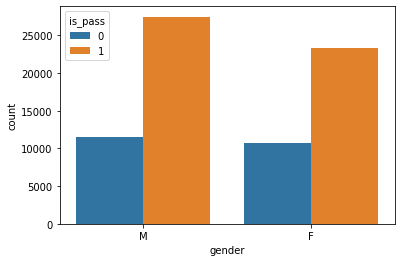

In [135]:
# Has Gender got something to do with the Pass/Fail
sns.countplot(x = "gender", hue = "is_pass", data = test)

In [134]:
# Has Gender got something to do with the Pass/Fail
data = pd.crosstab(newtest.gender, newtest.is_pass)
teststats, pvalue, df, exp_freq = stats.chi2_contingency(data)
print("Test Statistics: ", teststats)
print("PValue: ", pvalue)

# Gender has an Impact on Pass Fail

Test Statistics:  11.886799749325878
PValue:  0.000565331723291225


In [136]:
# Has the Program Type, Test Type & Difficulty Level an Impact on Program Duration
test.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [137]:
# Has the Mean Program Duration same for all the Categories - Program Type, Test Type & Difficulty Level
model = ols('program_duration~program_type+test_type+difficulty_level', data=newtest).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

# All 03 have an Impact on the Program Duration

,df,sum_sq,mean_sq,F,PR(>F)
program_type,6.0,1.641277e+05,27354.621935,646.969925,0.000000e+00
test_type,1.0,1.644184e+04,16441.836821,388.869346,3.355593e-86
difficulty_level,3.0,2.078956e+04,6929.854210,163.899442,1.121849e-105
Residual,45361.0,1.917915e+06,42.281134,NaN,NaN


In [144]:
# Gender, Education has an Impact on the Pass & Fail
data = pd.pivot_table(test, values = ["is_pass"], index = ["gender"], columns = ["education"], aggfunc = "count")
teststats, pvalue, df, exp_freq = stats.chi2_contingency(data)
print("Test Statistics: ", teststats)
print("PValue: ", pvalue)
# Since P Value is less than 0.05 and hence Gender, Education have an impact on the Target Variable.

Test Statistics:  473.04133103525027
PValue:  4.5298259049070655e-101


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


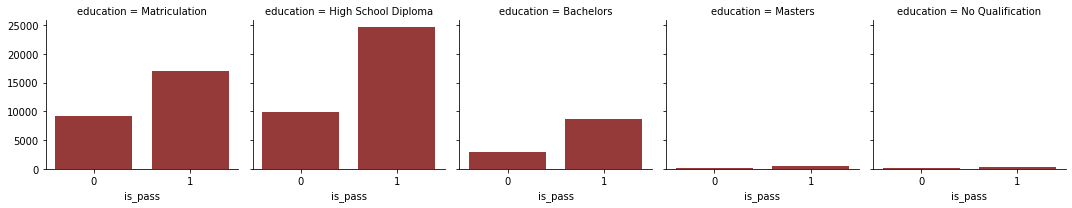

In [159]:
# sns.FacetGrid(tips, col="time", row="smoker")
# g.map(plt.hist, "total_bill")
g = sns.FacetGrid(test, col = "education")
g.map(sns.countplot, "is_pass", color = "brown")
plt.show()